## < Hierarchical Cluster Analysis >

We are interested in to perform a clustering analysis with sklearn library.
For this analysis, we first grouped the entire entries by 'neighborhood', which reduced the number of rows to 221, followed by calculating the mean values for each column.

In [12]:
# Import packages
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv("~/Desktop/AirBnbNYC2019.csv") 

In [2]:
# Import more libraries for clustering analysis

import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from scipy.spatial import distance_matrix
from sklearn.cluster import KMeans
from geopy.distance import vincenty

In [3]:
# Reload & reset data for Clustering Analysis

df = pd.read_csv("~/Desktop/AirBnbNYC2019.csv") 

df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

start = (40.730610, -73.935242)
stop = (df['latitude'], df['longitude'])
def distance_calc (row):
    start = (40.730610, -73.935242)
    stop = (row['latitude'], row['longitude'])

    return vincenty(start, stop).meters

df['distance'] = df.apply (lambda row: distance_calc (row),axis=1)

df.drop(['id','host_id','host_name','name','latitude','longitude','last_review','neighbourhood_group',
         'room_type'], axis=1, inplace=True)

df.head()

,neighbourhood,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,distance
0,Kensington,149,1,9,0.21,6,365,9749.259048
1,Midtown,225,1,45,0.38,2,355,4830.037496
2,Harlem,150,3,0,0.00,1,365,8725.513446
3,Clinton Hill,89,1,270,4.64,1,194,5457.919180
4,East Harlem,80,10,9,0.10,1,0,7576.342347


In [4]:
df['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [5]:
grouped_df = df.groupby('neighbourhood')
mdf = grouped_df.mean('price')
mdf = mdf.reset_index()
print(mdf)

       neighbourhood       price  minimum_nights  number_of_reviews  \
0           Allerton   87.595238        2.214286          42.928571   
1      Arden Heights   67.250000        9.500000           7.750000   
2           Arrochar  115.000000        2.761905          14.619048   
3            Arverne  171.779221        1.649351          29.259740   
4            Astoria  117.187778        6.036667          21.455556   
..               ...         ...             ...                ...   
216  Windsor Terrace  138.993631        8.713376          27.541401   
217        Woodhaven   67.170455        2.795455          31.727273   
218         Woodlawn   60.090909        1.454545          44.000000   
219          Woodrow  700.000000        7.000000           0.000000   
220         Woodside   85.097872       10.314894          21.425532   

     reviews_per_month  calculated_host_listings_count  availability_365  \
0             1.615714                        2.761905        163.66666

In [6]:
# Data preprocessing

mdf = mdf.set_index('neighbourhood')
mdf.isnull().sum(axis=0)
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(mdf)
df_normalized = pd.DataFrame(np_scaled, columns=mdf.columns, index=mdf.index)
df_normalized.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,distance
count,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000
mean,0.114148,0.097699,0.201351,0.298380,0.026271,0.417802,0.341760
std,0.125594,0.115145,0.125916,0.163172,0.087845,0.171082,0.197069
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.045701,0.031124,0.127227,0.198895,0.003764,0.291993,0.169602
50%,0.072365,0.074497,0.183065,0.264125,0.008062,0.411725,0.339368
75%,0.140010,0.119514,0.246918,0.362430,0.016590,0.518904,0.475438
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='neighbourhood', ylabel='neighbourhood'>

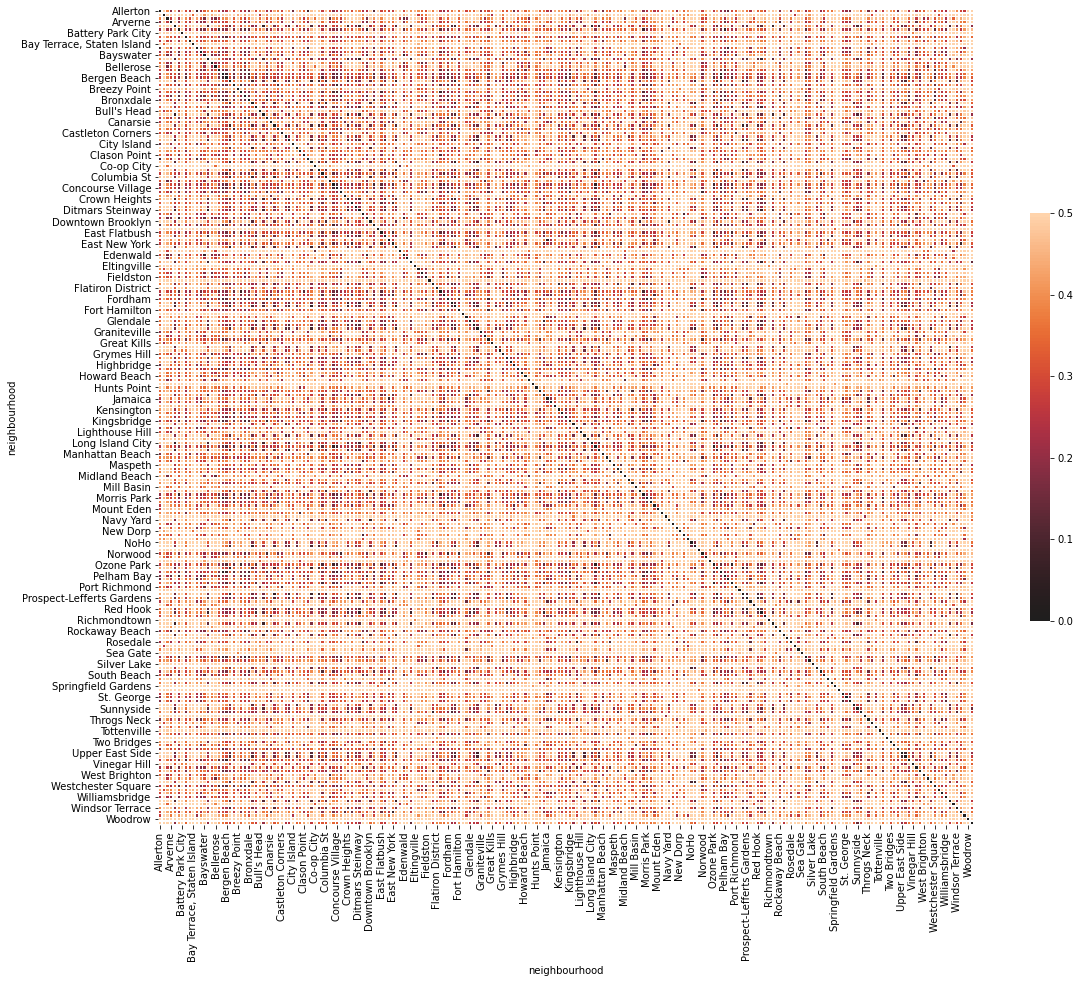

In [7]:
# Visualize the Data 

dist_matrix = pd.DataFrame(distance_matrix(df_normalized.values,
                           df_normalized.values, p=2),
                           index=df_normalized.index,
                           columns=df_normalized.index)
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(dist_matrix, vmax=.5, center=0, square=True, 
            linewidths=.5, cbar_kws={"shrink": .5})

In [8]:
# Correlation matrix table

corr_matrix = dist_matrix.corr()
corr_matrix

neighbourhood,Allerton,Arden Heights,Arrochar,Arverne,Astoria,Bath Beach,Battery Park City,Bay Ridge,Bay Terrace,"Bay Terrace, Staten Island",...,Westerleigh,Whitestone,Williamsbridge,Williamsburg,Willowbrook,Windsor Terrace,Woodhaven,Woodlawn,Woodrow,Woodside
neighbourhood,,,,,,,,,,,,,,,,,,,,,
Allerton,1.000000,0.545626,0.730072,0.919361,0.390820,0.924495,-0.065597,0.760849,0.908696,0.266800,...,0.613999,0.905878,0.910597,0.281691,0.449212,0.454809,0.846662,0.920316,-0.130135,0.416443
Arden Heights,0.545626,1.000000,0.646907,0.698498,0.070261,0.609035,0.032807,0.552137,0.482760,0.831602,...,0.896249,0.319828,0.559963,0.026294,0.466317,0.240147,0.193047,0.555002,0.470757,0.028637
Arrochar,0.730072,0.646907,1.000000,0.902308,0.081506,0.880708,-0.116112,0.587450,0.856157,0.272810,...,0.677173,0.613438,0.897778,-0.034243,0.901029,0.125228,0.562340,0.534627,0.022758,0.117219
Arverne,0.919361,0.698498,0.902308,1.000000,0.194217,0.943468,-0.123569,0.697400,0.902332,0.342338,...,0.713309,0.788855,0.958062,0.084361,0.700531,0.277151,0.687738,0.809561,0.045632,0.212550
Astoria,0.390820,0.070261,0.081506,0.194217,1.000000,0.412831,0.711218,0.780165,0.441527,0.339284,...,0.402652,0.489774,0.150809,0.985817,-0.189799,0.966762,0.643361,0.283662,0.046693,0.977756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Windsor Terrace,0.454809,0.240147,0.125228,0.277151,0.966762,0.455284,0.718248,0.839472,0.466323,0.505472,...,0.536696,0.484676,0.193289,0.960522,-0.171655,1.000000,0.601109,0.374955,0.177237,0.926078
Woodhaven,0.846662,0.193047,0.562340,0.687738,0.643361,0.834514,0.142167,0.781404,0.847966,0.044125,...,0.394029,0.947237,0.754299,0.531335,0.291935,0.601109,1.000000,0.710166,-0.328127,0.703455
Woodlawn,0.920316,0.555002,0.534627,0.809561,0.283662,0.766224,-0.193039,0.619520,0.697193,0.289579,...,0.530399,0.845146,0.787855,0.199558,0.235346,0.374955,0.710166,1.000000,-0.127271,0.290141


In [9]:
# KMeans Clustering using *sklearn*

kmeans = KMeans(n_clusters=2, n_init=25, max_iter=100, random_state=6)
kmeans.fit(df_normalized)
kmeans.__dict__.keys()
kmeans.labels_

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0], dtype=int32)

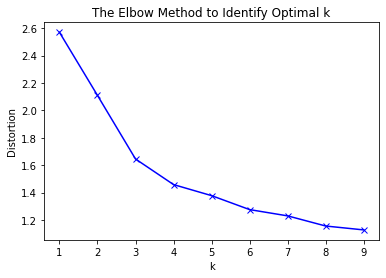

In [10]:
# Elbow Method 

from scipy.spatial.distance import cdist
distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(dist_matrix)
    kmeanModel.fit(dist_matrix)
    distortions.append(sum(np.min(cdist(dist_matrix, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / dist_matrix.shape[0])
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method to Identify Optimal k')
plt.show()

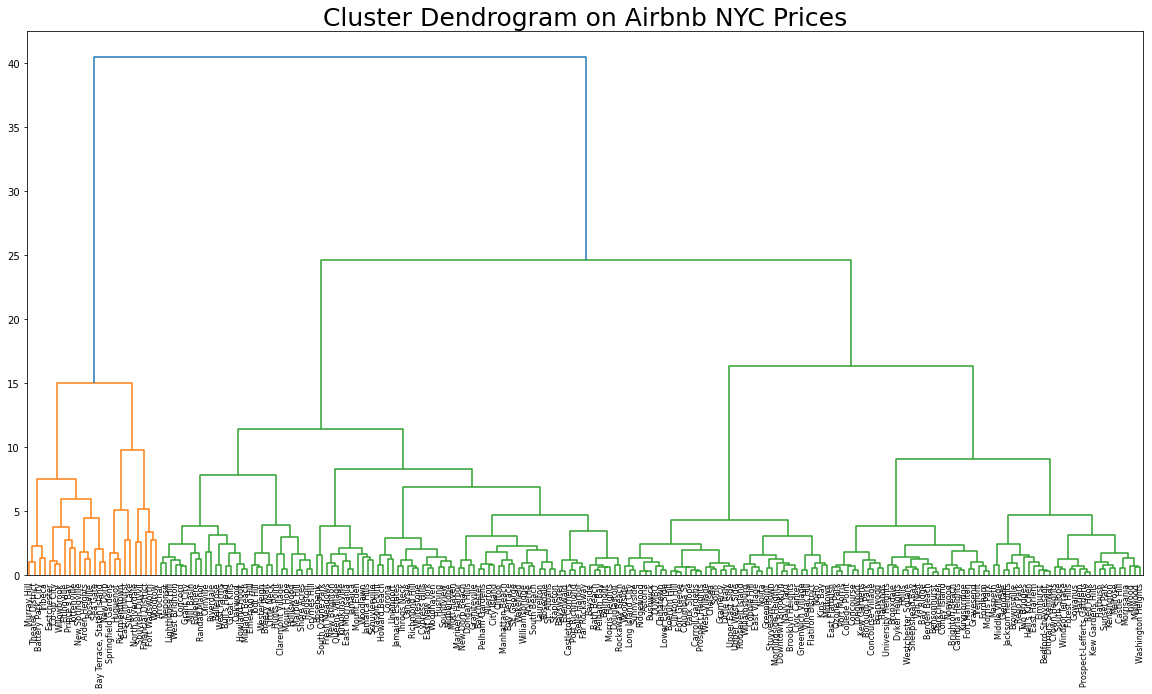

In [13]:
# Draw a ccluster dendrogram

from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist_matrix)

fig, ax = plt.subplots(figsize=(20, 10))
ax.grid(False)
ax.set_title('Cluster Dendrogram on Airbnb NYC Prices', fontsize = 25)
ax = dendrogram(linkage_matrix, orientation='top', labels=dist_matrix.index)
plt.xticks(fontsize=8)
plt.show()